In [1]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification
License(s): CC0-1.0
 96% 183M/190M [00:01<00:00, 136MB/s]
100% 190M/190M [00:01<00:00, 125MB/s]


In [ ]:
!unzip /content/traffic-sign-dataset-classification.zip

In [3]:
import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

In [4]:
batch_size = 32
img_height = 150
img_width = 150

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/traffic_Data/DATA',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/traffic_Data/DATA',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [30]:
class_names

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '6',
 '7',
 '8',
 '9']

In [6]:
df_labels = pd.read_csv('/content/labels.csv')
df_labels.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


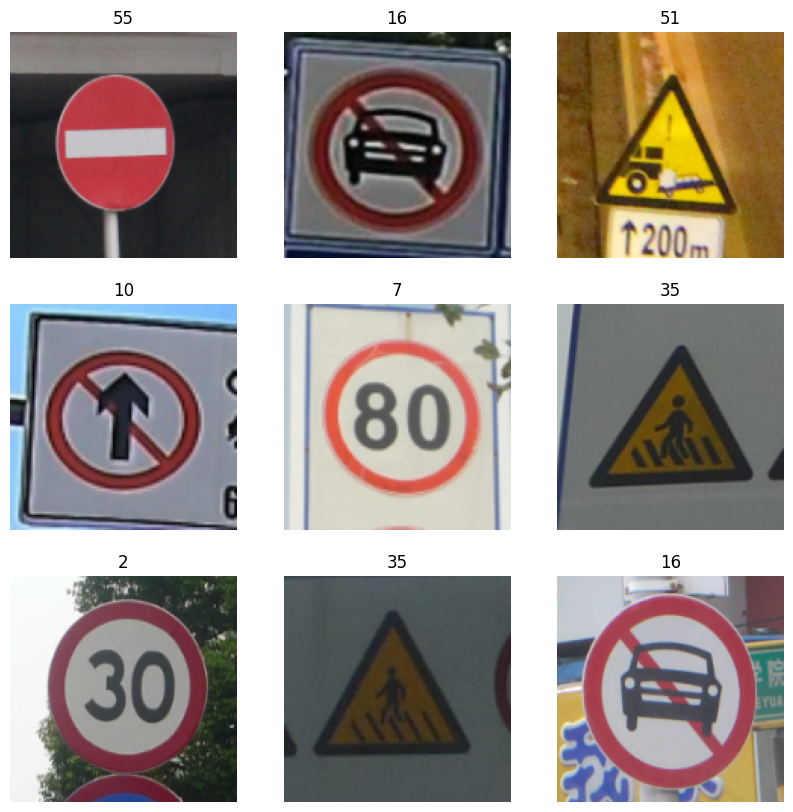

In [27]:
plt.figure(figsize=(10,10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
model = models.Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

In [26]:
epochs = 15
history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.2039 - loss: 3.3490 - val_accuracy: 0.6331 - val_loss: 1.4878
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7184 - loss: 1.0903 - val_accuracy: 0.7962 - val_loss: 0.7020
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8952 - loss: 0.3775 - val_accuracy: 0.8993 - val_loss: 0.3448
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9480 - loss: 0.1875 - val_accuracy: 0.9460 - val_loss: 0.2221
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9857 - loss: 0.0679 - val_accuracy: 0.9628 - val_loss: 0.1761
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9951 - loss: 0.0288 - val_accuracy: 0.9688 - val_loss: 0.1556
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9991 - loss: 0.0120 - val_accuracy: 0.9592 - val_loss: 0.2177
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9965 - loss: 0.0196 - val_ac

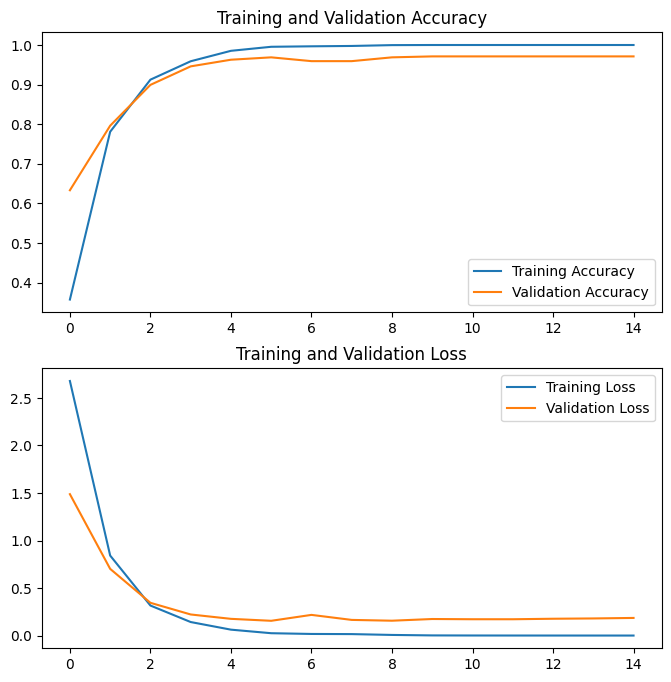

Maximum Validation Accuracy: 0.971222996711731


In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))